In [50]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [51]:
X,y = make_classification(n_samples=20000, n_features=10)

In [52]:
X

array([[ 0.76896106,  0.64711457,  0.63375462, ...,  0.52209438,
        -0.48235056,  0.16781076],
       [-1.79718612, -1.3878493 , -0.49787206, ..., -1.39951777,
         0.08904699,  1.03617187],
       [ 1.23969548, -1.5021061 , -0.40852741, ..., -0.85661027,
         2.84258622, -0.88653018],
       ...,
       [ 0.27964948, -0.41244554,  0.44004754, ..., -1.15210617,
        -0.99835606,  1.59853043],
       [-0.4899203 , -0.48330854, -0.44333407, ...,  0.44085717,
        -0.2345361 ,  0.21923326],
       [ 1.0554805 ,  0.90506946, -0.09137098, ..., -0.47371589,
        -0.36593247, -1.28613284]])

In [53]:
y

array([0, 1, 1, ..., 0, 0, 0])

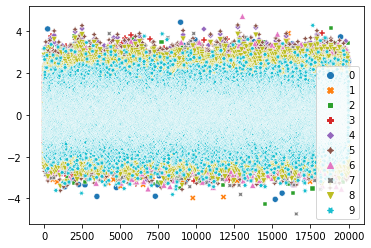

In [54]:
sns.scatterplot(data=X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=48)

In [56]:
 # Sinlge logistic regression on model
 from sklearn.metrics import accuracy_score
 lr = LogisticRegression()
 lr.fit(X_train, y_train)
 y_pred = lr.predict(X_test)
 print("Accuracy of logistic regression model is", accuracy_score(y_test, y_pred))

Accuracy of logistic regression model is 0.922


In [57]:
# Sinlge logistic regression on model
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy of Decision tree model is", accuracy_score(y_test, y_pred))

Accuracy of Decision tree model is 0.9215


**BAGGING with Decision Tree**

In [58]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=0.2,
    bootstrap=True
)

In [59]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.2,
                  n_estimators=400)

In [60]:
y_pred = bag.predict(X_test)

In [61]:
print("Accuracy of Bagging model is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model is 0.94575


In [62]:
bag.estimators_samples_

[array([ 3424,  9701,  1332, ...,  3999, 10367,   377]),
 array([ 2522,  6409, 12277, ...,  5561,  1548, 11790]),
 array([ 1511,  2443,  3026, ...,  5300, 14988,  5580]),
 array([1438, 5666, 2410, ..., 4360, 1551, 8508]),
 array([ 3491,  3658, 14711, ...,  9381,  9029,   108]),
 array([10181,  1771,  1927, ...,  7254, 12801,  7538]),
 array([ 1388, 15603,  7669, ..., 14940,  8559, 15626]),
 array([12058,  5858, 13550, ..., 14229,  7942,  1039]),
 array([ 8469, 14319,  4851, ...,  1871,  2234, 14792]),
 array([ 4905,  1166,  2730, ..., 14128, 12692,  4603]),
 array([ 9303,  9403,   574, ..., 13449, 15017, 10653]),
 array([ 7619,  8299, 12143, ...,  9495,  3779, 11012]),
 array([  571, 10613, 12305, ...,  7782, 15851, 15670]),
 array([10043,  6319, 15359, ..., 10571,  5359,  5985]),
 array([ 6221,  7650, 14633, ...,  7103,  7144,  2883]),
 array([  504,  4798,  7434, ..., 12151, 15537, 10711]),
 array([13829,  7175, 12618, ..., 11721,  3224,  6372]),
 array([ 4920,  2855, 13410, ..., 102

In [63]:
bag.estimators_samples_[0].shape

(3200,)

In [64]:
# same as we are using row sampling
bag.estimators_features_[0].shape

(10,)

BAGGING with Logistic Regression

In [65]:
bag = BaggingClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=800,
    max_samples=0.4,
    bootstrap=True
)

In [66]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.4,
                  n_estimators=800)

In [67]:
y_pred = bag.predict(X_test)

In [68]:
print("Accuracy of Bagging model is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model is 0.92225


Random Subspaces with Column Subsampling

In [69]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=1.0,
    max_features=0.5,
    bootstrap=True
)

In [70]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=400)

In [71]:
y_pred = bag.predict(X_test)

In [72]:
print("Accuracy of Bagging model with column sampling is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model with column sampling is 0.942


In [73]:
bag.estimators_features_[0].shape

(5,)

**Random patches with both row and column sampling**

In [74]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=400,
    max_samples=0.4,
    max_features=0.5,
    bootstrap=True
)

In [75]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.4, n_estimators=400)

In [76]:
y_pred = bag.predict(X_test)

In [77]:
print("Accuracy of Bagging model with Random patches is", accuracy_score(y_test, y_pred))

Accuracy of Bagging model with Random patches is 0.94425
